# Import libraries

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

In [206]:
header = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '>50K'
]
df = pd.read_csv('datasets/adult.data', header=None, names=header) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  >50K            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Preprocess data

## Encode df

In [207]:
def encode_values(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    return df

df = encode_values(df)

## Drop Nan values

In [208]:
def drop_na(df):
    df_cleaned = df.dropna()
    return df_cleaned

df = drop_na(df)

## Remove outliers

In [209]:
# def remove_outliers(df):
#     for column in df.columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df
# 
# df = remove_outliers(df)

## Normalize

In [210]:
def normalize(df):
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

df = normalize(df)

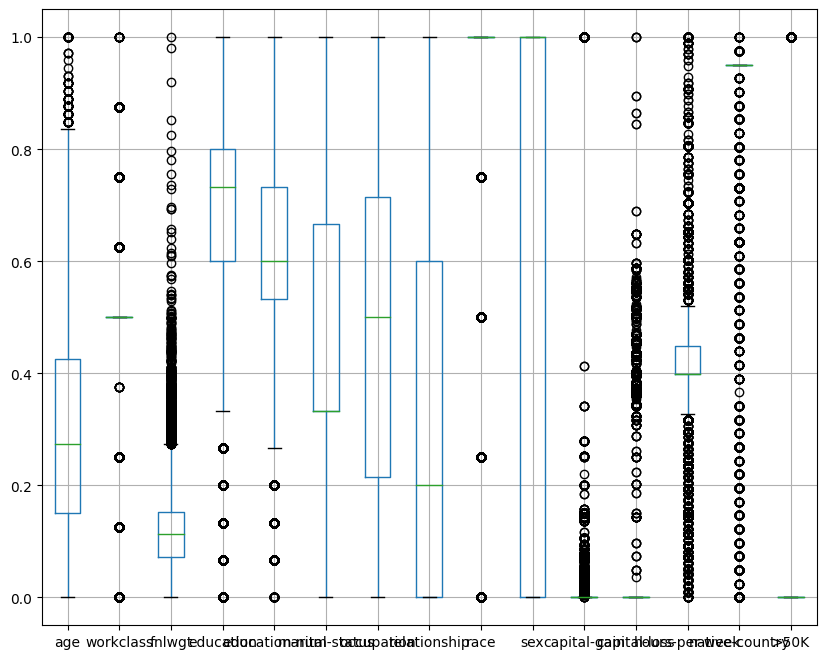

In [211]:
plt.figure(figsize=(10, 8))
df.boxplot()
plt.show()

## Train Test Split

In [212]:
X = df.drop('>50K', axis=1)
y = df['>50K'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

## Naive bayes

In [213]:
# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
nb_pred = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_pred))

Naïve Bayes Accuracy: 0.8093044679871028
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4942
         1.0       0.71      0.36      0.48      1571

    accuracy                           0.81      6513
   macro avg       0.77      0.66      0.68      6513
weighted avg       0.80      0.81      0.79      6513


## Random forest

In [214]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8619683709504069
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4942
         1.0       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513
